### Regression

In [98]:
import pandas as pd
data = pd.read_csv('botswana.tsv','\t')


In [99]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000025730198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000267BC1D0>]], dtype=object)

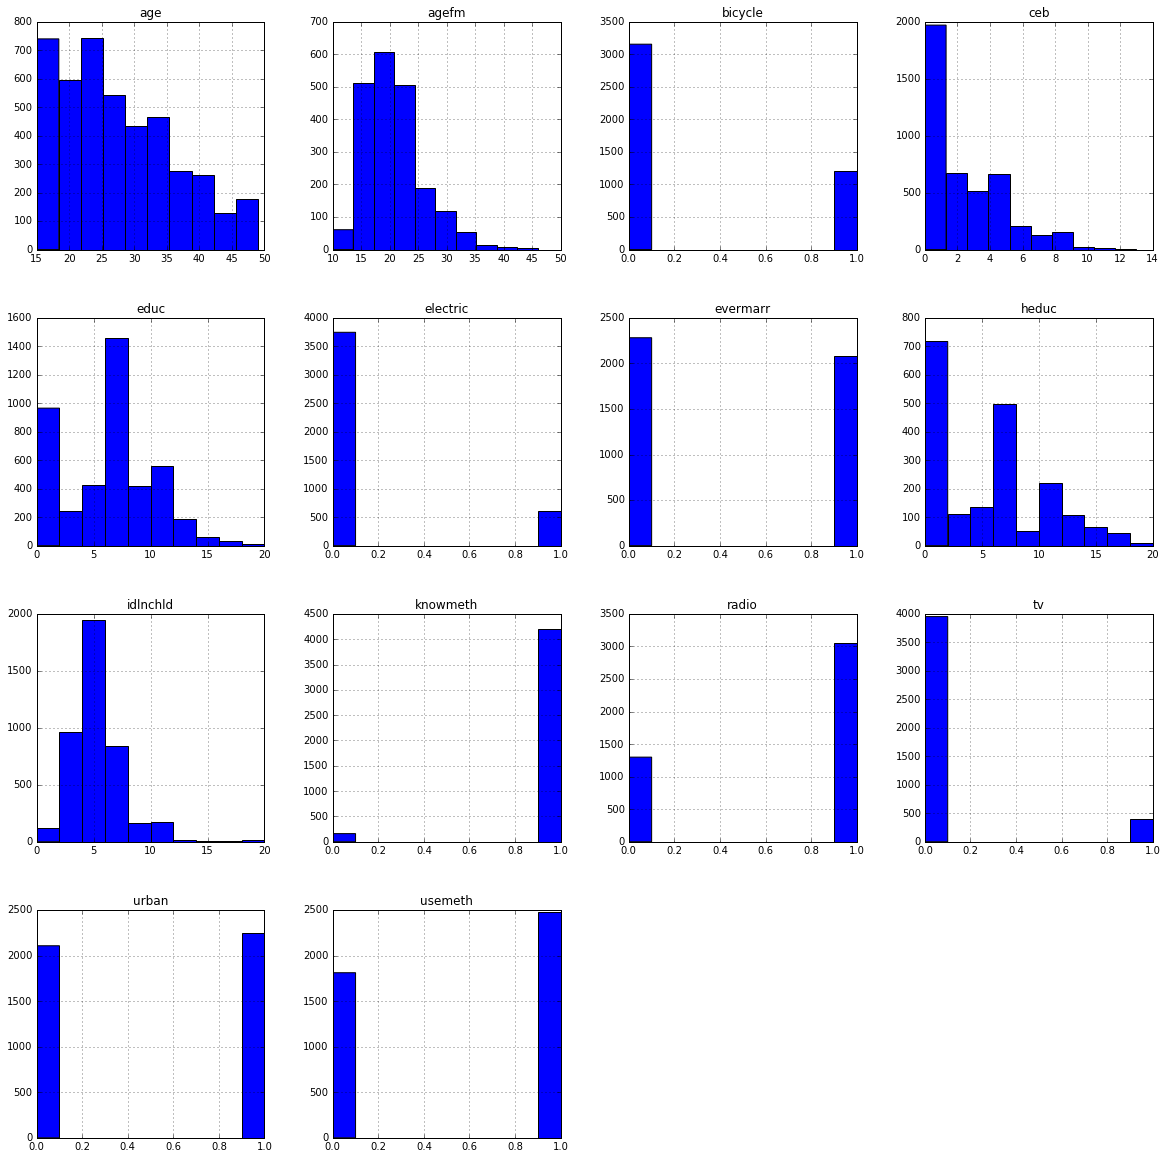

In [100]:
from matplotlib import pyplot as plt
%matplotlib inline
data.hist(figsize=(20,20), bins=10)

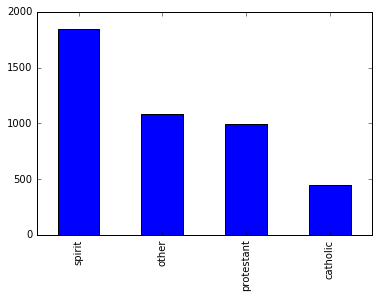

In [102]:
data['religion'].value_counts().plot(kind = 'bar')

В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному.

Например, в признаке agefm пропуски стоят только там, где evermarr=0, то есть, они соответствуют женщинам, никогда не выходившим замуж. Таким образом, для этого признака NaN соответствует значению "не применимо".

In [103]:
import numpy as np
print np.min(data.agefm), np.max(data.agefm)
data['nevermarr'] = 0
data.ix[data['evermarr']==0, 'nevermarr']=1

10.0 46.0


In [104]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [106]:
data.drop('evermarr', axis=1)
data['agefm'].fillna(0, inplace=True)
data.ix[data['agefm']==0, 'heduc']=-1
print data.info()

KeyError: False

In [116]:
len(data) - np.sum(data['heduc'].value_counts())

123L

4361